### Step 2: Take the Shakespeare play you've previously been analyzing and construct a network visualization

In [2]:
import dash
import dash_cytoscape as cyto
from dash import html, dcc
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
from jupyter_dash.comms import _send_jupyter_config_comm_request

In [3]:
_send_jupyter_config_comm_request()

In [5]:
JupyterDash.infer_jupyter_proxy_config()

In [6]:
with open('hamlet.txt') as f:
    x = f.read()

In [7]:
x

'\ufeffThe Project Gutenberg eBook of Hamlet, by William Shakespeare\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org. If you are not located in the United States, you\nwill have to check the laws of the country where you are located before\nusing this eBook.\n\nTitle: Hamlet\n\nAuthor: William Shakespeare\n\nRelease Date: November 1998 [eBook #1524]\n[Most recently updated: October 17, 2021]\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\nProduced by: Dianne Bean\n\n*** START OF THE PROJECT GUTENBERG EBOOK HAMLET ***\n\n\n\n\nTHE TRAGEDY OF HAMLET, PRINCE OF DENMARK\n\nby William Shakespeare\n\n\nContents\n\nACT I\nScene I. Elsinore. A platform before the Castle.\nScene II. Elsinore. A room of state in the Castle\nScene

In [8]:
acts = x.split('ACT')[6:]

In [9]:
#the number of acts in Hamlet
len(acts)

7

In [10]:
characters = [
    'HAMLET',
    'CLAUDIUS', 
    'The GHOST'
    'GERTRUDE', 
    'POLONIUS',
    'LAERTES', 
    'OPHELIA', 
    'HORATIO', 
    'FORTINBRAS',
    'VOLTEMAND', 
    'CORNELIUS', 
    'ROSENCRANTZ', 
    'GUILDENSTERN',
    'MARCELLUS',
    'BARNARDO', 
    'FRANCISCO',
    'OSRIC',
    'REYNALDO'
]

Nodes of the graph will be the characterst; edges will be interactions between characters.

In [11]:
charnum = {}

connections = {}
for i in range(len(characters)-1):
    for j in range(i+1,len(characters)):
        connections[(characters[i],characters[j])] = 0

for k in characters:
    charnum[k] = 0

for i in acts:
    for j in i.split('SCENE')[1:]:
        scenechars = []
        for k in characters:
            if j.find(k) != -1:
                scenechars.append(k)
                charnum[k] += 1
        for a in range(len(scenechars)-1):
            for b in range(a+1,len(scenechars)):
                connections[(scenechars[a],scenechars[b])] += 1

In [12]:
charnum

{'HAMLET': 15,
 'CLAUDIUS': 0,
 'The GHOSTGERTRUDE': 0,
 'POLONIUS': 8,
 'LAERTES': 6,
 'OPHELIA': 5,
 'HORATIO': 8,
 'FORTINBRAS': 2,
 'VOLTEMAND': 2,
 'CORNELIUS': 1,
 'ROSENCRANTZ': 7,
 'GUILDENSTERN': 5,
 'MARCELLUS': 4,
 'BARNARDO': 2,
 'FRANCISCO': 1,
 'OSRIC': 1,
 'REYNALDO': 1}

In [14]:
connections

{('HAMLET', 'CLAUDIUS'): 0,
 ('HAMLET', 'The GHOSTGERTRUDE'): 0,
 ('HAMLET', 'POLONIUS'): 6,
 ('HAMLET', 'LAERTES'): 4,
 ('HAMLET', 'OPHELIA'): 2,
 ('HAMLET', 'HORATIO'): 7,
 ('HAMLET', 'FORTINBRAS'): 2,
 ('HAMLET', 'VOLTEMAND'): 2,
 ('HAMLET', 'CORNELIUS'): 1,
 ('HAMLET', 'ROSENCRANTZ'): 7,
 ('HAMLET', 'GUILDENSTERN'): 5,
 ('HAMLET', 'MARCELLUS'): 3,
 ('HAMLET', 'BARNARDO'): 1,
 ('HAMLET', 'FRANCISCO'): 0,
 ('HAMLET', 'OSRIC'): 1,
 ('HAMLET', 'REYNALDO'): 0,
 ('CLAUDIUS', 'The GHOSTGERTRUDE'): 0,
 ('CLAUDIUS', 'POLONIUS'): 0,
 ('CLAUDIUS', 'LAERTES'): 0,
 ('CLAUDIUS', 'OPHELIA'): 0,
 ('CLAUDIUS', 'HORATIO'): 0,
 ('CLAUDIUS', 'FORTINBRAS'): 0,
 ('CLAUDIUS', 'VOLTEMAND'): 0,
 ('CLAUDIUS', 'CORNELIUS'): 0,
 ('CLAUDIUS', 'ROSENCRANTZ'): 0,
 ('CLAUDIUS', 'GUILDENSTERN'): 0,
 ('CLAUDIUS', 'MARCELLUS'): 0,
 ('CLAUDIUS', 'BARNARDO'): 0,
 ('CLAUDIUS', 'FRANCISCO'): 0,
 ('CLAUDIUS', 'OSRIC'): 0,
 ('CLAUDIUS', 'REYNALDO'): 0,
 ('The GHOSTGERTRUDE', 'POLONIUS'): 0,
 ('The GHOSTGERTRUDE', 'LAERTES

In [15]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)

In [16]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)

for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v}}
        graphitems.append(dashedge)

In [17]:
for k,v in charnum.items():
    print(k,v)

HAMLET 15
CLAUDIUS 0
The GHOSTGERTRUDE 0
POLONIUS 8
LAERTES 6
OPHELIA 5
HORATIO 8
FORTINBRAS 2
VOLTEMAND 2
CORNELIUS 1
ROSENCRANTZ 7
GUILDENSTERN 5
MARCELLUS 4
BARNARDO 2
FRANCISCO 1
OSRIC 1
REYNALDO 1


In [18]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/lilykohn@g.ucla.edu/proxy/8050/


In [43]:
# Not a lot of style in this network analysis graph, hard to differentiate nodes and edges.

In [21]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)
    
for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v}}
        graphitems.append(dashedge)
    
graphitems


[{'data': {'id': 'HAMLET', 'label': 'Hamlet', 'size': '15'}},
 {'data': {'id': 'CLAUDIUS', 'label': 'Claudius', 'size': '0'}},
 {'data': {'id': 'The GHOSTGERTRUDE',
   'label': 'The Ghostgertrude',
   'size': '0'}},
 {'data': {'id': 'POLONIUS', 'label': 'Polonius', 'size': '8'}},
 {'data': {'id': 'LAERTES', 'label': 'Laertes', 'size': '6'}},
 {'data': {'id': 'OPHELIA', 'label': 'Ophelia', 'size': '5'}},
 {'data': {'id': 'HORATIO', 'label': 'Horatio', 'size': '8'}},
 {'data': {'id': 'FORTINBRAS', 'label': 'Fortinbras', 'size': '2'}},
 {'data': {'id': 'VOLTEMAND', 'label': 'Voltemand', 'size': '2'}},
 {'data': {'id': 'CORNELIUS', 'label': 'Cornelius', 'size': '1'}},
 {'data': {'id': 'ROSENCRANTZ', 'label': 'Rosencrantz', 'size': '7'}},
 {'data': {'id': 'GUILDENSTERN', 'label': 'Guildenstern', 'size': '5'}},
 {'data': {'id': 'MARCELLUS', 'label': 'Marcellus', 'size': '4'}},
 {'data': {'id': 'BARNARDO', 'label': 'Barnardo', 'size': '2'}},
 {'data': {'id': 'FRANCISCO', 'label': 'Francisco',

In [22]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '100%', 'height': '750px'},
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'content':'data(label)',
                    'text-halign':'center',
                    'text-valign':'center',
                    'width': 'data(size)',
                    'height': 'data(size)',
                    'font-size':4,
                    'color': 'black',
                    'background-color': 'red',
                    'text-outline-color': 'white',
                    'text-outline-width': 0.2,
                    'shape':'circle'
                }
            },
            {
                'selector':'edge',
                'style': {
                    'width':'data(weight)',
                    'line-color': 'blue',
                  }
            },
        ]
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/lilykohn@g.ucla.edu/proxy/8050/


In [23]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)

correction_factor = max(connections.values())
print(correction_factor)
for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v/correction_factor}}
        graphitems.append(dashedge)
    
#graphitems

7


In [24]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '75%', 'height': '1000px'},
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'content':'data(label)',
                    'text-halign':'center',
                    'text-valign':'center',
                    'width': 'data(size)',
                    'height': 'data(size)',
                    'font-size':4,
                    'color': 'black',
                    'background-color': 'red',
                    'text-outline-color': 'white',
                    'text-outline-width': 0.2,
                    'shape':'circle'
                }
            },
            {
                'selector':'edge',
                'style': {
                    'width':'data(weight)',
                    'line-color': 'blue',
                  }
            },
        ]
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/lilykohn@g.ucla.edu/proxy/8050/


Graph has been edited so that the aesthetics of the visualization are enhanced. This visualization shows us that the character of Hamlet has greatest centrality since his circle is the largest, and that his most frequent interactions occur with Polonius, Horatio, and Rosencratz. Guildentstern and Laertes also appear to have strong connections to Hamlet. Going to, though, find the centrality of characters to make a more precise graph. 

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

In [27]:
nxgraphitems = []

# for k,v in charnum.items():
#     dashnode = k
#     graphitems.append(dashnode)

for k,v in connections.items():
    if v != 0:
        dashedge = (k[0],k[1])
        nxgraphitems.append(dashedge)
    
nxgraphitems

[('HAMLET', 'POLONIUS'),
 ('HAMLET', 'LAERTES'),
 ('HAMLET', 'OPHELIA'),
 ('HAMLET', 'HORATIO'),
 ('HAMLET', 'FORTINBRAS'),
 ('HAMLET', 'VOLTEMAND'),
 ('HAMLET', 'CORNELIUS'),
 ('HAMLET', 'ROSENCRANTZ'),
 ('HAMLET', 'GUILDENSTERN'),
 ('HAMLET', 'MARCELLUS'),
 ('HAMLET', 'BARNARDO'),
 ('HAMLET', 'OSRIC'),
 ('POLONIUS', 'LAERTES'),
 ('POLONIUS', 'OPHELIA'),
 ('POLONIUS', 'HORATIO'),
 ('POLONIUS', 'VOLTEMAND'),
 ('POLONIUS', 'CORNELIUS'),
 ('POLONIUS', 'ROSENCRANTZ'),
 ('POLONIUS', 'GUILDENSTERN'),
 ('POLONIUS', 'MARCELLUS'),
 ('POLONIUS', 'BARNARDO'),
 ('POLONIUS', 'REYNALDO'),
 ('LAERTES', 'OPHELIA'),
 ('LAERTES', 'HORATIO'),
 ('LAERTES', 'FORTINBRAS'),
 ('LAERTES', 'VOLTEMAND'),
 ('LAERTES', 'CORNELIUS'),
 ('LAERTES', 'MARCELLUS'),
 ('LAERTES', 'BARNARDO'),
 ('LAERTES', 'OSRIC'),
 ('OPHELIA', 'HORATIO'),
 ('OPHELIA', 'ROSENCRANTZ'),
 ('OPHELIA', 'GUILDENSTERN'),
 ('OPHELIA', 'REYNALDO'),
 ('HORATIO', 'FORTINBRAS'),
 ('HORATIO', 'VOLTEMAND'),
 ('HORATIO', 'CORNELIUS'),
 ('HORATIO', 'ROS

In [28]:
G = nx.Graph()


In [29]:
G.add_edges_from(nxgraphitems)

In [30]:
G.nodes

NodeView(('HAMLET', 'POLONIUS', 'LAERTES', 'OPHELIA', 'HORATIO', 'FORTINBRAS', 'VOLTEMAND', 'CORNELIUS', 'ROSENCRANTZ', 'GUILDENSTERN', 'MARCELLUS', 'BARNARDO', 'OSRIC', 'REYNALDO', 'FRANCISCO'))

In [31]:
nx.degree_centrality(G)

{'HAMLET': 0.8571428571428571,
 'POLONIUS': 0.7857142857142857,
 'LAERTES': 0.7142857142857142,
 'OPHELIA': 0.5,
 'HORATIO': 0.9285714285714285,
 'FORTINBRAS': 0.3571428571428571,
 'VOLTEMAND': 0.6428571428571428,
 'CORNELIUS': 0.5,
 'ROSENCRANTZ': 0.5,
 'GUILDENSTERN': 0.42857142857142855,
 'MARCELLUS': 0.5714285714285714,
 'BARNARDO': 0.5714285714285714,
 'OSRIC': 0.2857142857142857,
 'REYNALDO': 0.14285714285714285,
 'FRANCISCO': 0.21428571428571427}

In [32]:
dc = nx.degree_centrality(G)
for i in sorted(dc, key=dc.get, reverse=True):
    print('{:15s}: {:.3f}'.format(i.title(), dc[i]))

Horatio        : 0.929
Hamlet         : 0.857
Polonius       : 0.786
Laertes        : 0.714
Voltemand      : 0.643
Marcellus      : 0.571
Barnardo       : 0.571
Ophelia        : 0.500
Cornelius      : 0.500
Rosencrantz    : 0.500
Guildenstern   : 0.429
Fortinbras     : 0.357
Osric          : 0.286
Francisco      : 0.214
Reynaldo       : 0.143


In [33]:
nx.betweenness_centrality(G)

{'HAMLET': 0.09102564102564101,
 'POLONIUS': 0.12124542124542126,
 'LAERTES': 0.05769230769230771,
 'OPHELIA': 0.04523809523809524,
 'HORATIO': 0.1697802197802198,
 'FORTINBRAS': 0.005494505494505495,
 'VOLTEMAND': 0.020512820512820516,
 'CORNELIUS': 0.0,
 'ROSENCRANTZ': 0.016483516483516484,
 'GUILDENSTERN': 0.0018315018315018315,
 'MARCELLUS': 0.021062271062271064,
 'BARNARDO': 0.021062271062271064,
 'OSRIC': 0.0,
 'REYNALDO': 0.0,
 'FRANCISCO': 0.0}

In [34]:
dc = nx.betweenness_centrality(G)
for i in sorted(dc, key=dc.get, reverse=True):
    print('{:15s}: {:.3f}'.format(i.title(), dc[i]))

Horatio        : 0.170
Polonius       : 0.121
Hamlet         : 0.091
Laertes        : 0.058
Ophelia        : 0.045
Marcellus      : 0.021
Barnardo       : 0.021
Voltemand      : 0.021
Rosencrantz    : 0.016
Fortinbras     : 0.005
Guildenstern   : 0.002
Cornelius      : 0.000
Osric          : 0.000
Reynaldo       : 0.000
Francisco      : 0.000


In [35]:
from networkx.algorithms.community import greedy_modularity_communities

In [36]:
greedy_modularity_communities(G)

[frozenset({'BARNARDO',
            'CORNELIUS',
            'FRANCISCO',
            'HORATIO',
            'MARCELLUS',
            'VOLTEMAND'}),
 frozenset({'GUILDENSTERN', 'OPHELIA', 'POLONIUS', 'REYNALDO', 'ROSENCRANTZ'}),
 frozenset({'FORTINBRAS', 'HAMLET', 'LAERTES', 'OSRIC'})]

In [37]:
communities = greedy_modularity_communities(G)
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

In [38]:
modularity_class

{'FRANCISCO': 0,
 'CORNELIUS': 0,
 'HORATIO': 0,
 'MARCELLUS': 0,
 'VOLTEMAND': 0,
 'BARNARDO': 0,
 'OPHELIA': 1,
 'GUILDENSTERN': 1,
 'ROSENCRANTZ': 1,
 'REYNALDO': 1,
 'POLONIUS': 1,
 'LAERTES': 2,
 'FORTINBRAS': 2,
 'OSRIC': 2,
 'HAMLET': 2}

[['FRANCISCO', 'CORNELIUS', 'HORATIO', 'MARCELLUS', 'VOLTEMAND', 'BARNARDO'], ['OPHELIA', 'GUILDENSTERN', 'ROSENCRANTZ', 'REYNALDO', 'POLONIUS'], ['LAERTES', 'FORTINBRAS', 'OSRIC', 'HAMLET']]


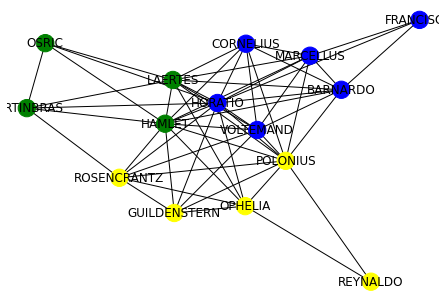

In [39]:
communities = greedy_modularity_communities(G)

node_groups = []
for com in communities:
    node_groups.append(list(com))
 
print(node_groups)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    elif node in node_groups[1]:
        color_map.append('yellow')
    else:
        color_map.append('green')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [ ]:
graphitems = []

for k,v in charnum.items():
    if k in node_groups[0]:
        modularity = 'blue'
    elif k in node_groups[1]:
        modularity = 'red'
    else:
        modularity = 'green'
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v),'modularity': modularity}}
    graphitems.append(dashnode)

correction_factor = max(connections.values())
print(correction_factor)
for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v/correction_factor}}
        graphitems.append(dashedge)
    
graphitems

7


[{'data': {'id': 'HAMLET',
   'label': 'Hamlet',
   'size': '15',
   'modularity': 'green'}},
 {'data': {'id': 'CLAUDIUS',
   'label': 'Claudius',
   'size': '0',
   'modularity': 'green'}},
 {'data': {'id': 'The GHOSTGERTRUDE',
   'label': 'The Ghostgertrude',
   'size': '0',
   'modularity': 'green'}},
 {'data': {'id': 'POLONIUS',
   'label': 'Polonius',
   'size': '8',
   'modularity': 'red'}},
 {'data': {'id': 'LAERTES',
   'label': 'Laertes',
   'size': '6',
   'modularity': 'green'}},
 {'data': {'id': 'OPHELIA',
   'label': 'Ophelia',
   'size': '5',
   'modularity': 'red'}},
 {'data': {'id': 'HORATIO',
   'label': 'Horatio',
   'size': '8',
   'modularity': 'blue'}},
 {'data': {'id': 'FORTINBRAS',
   'label': 'Fortinbras',
   'size': '2',
   'modularity': 'green'}},
 {'data': {'id': 'VOLTEMAND',
   'label': 'Voltemand',
   'size': '2',
   'modularity': 'blue'}},
 {'data': {'id': 'CORNELIUS',
   'label': 'Cornelius',
   'size': '1',
   'modularity': 'blue'}},
 {'data': {'id': 'RO

## Final Graph

In [42]:
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '100%', 'height': '750px'},
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'content':'data(label)',
                    'text-halign':'center',
                    'text-valign':'center',
                    'width': 'data(size)',
                    'height': 'data(size)',
                    'font-size': 4,
                    'color': 'black',
                    'background-color': 'data(modularity)',
                    'text-outline-color': 'white',
                    'text-outline-width': 0.2,
                    'shape':'circle'
                }
            },
            {
                'selector':'edge',
                'style': {
                    'width':'data(weight)',
                    'line-color': 'pink',
                  }
            },
        ]
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/lilykohn@g.ucla.edu/proxy/8050/


This more precise network analysis allows us to see the centrality of the character of Horatio in the play Hamlet, which I had missed prior. The communities of the graph are also quite interesting-- I wish I remembered the play better so I could more fully speak to this analysis.